In [1]:
import os
import random
import numpy as np
import tensorflow as tf
import pickle
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import preprocess_input

# ---- Set Random Seed for Reproducibility ----
seed = 42
os.environ['PYTHONHASHSEED'] = str(seed)
os.environ['TF_DETERMINISTIC_OPS'] = '1'
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)

# ---- Paths ----
train_dir = 'D:/Lung_cancer/train'
val_dir = 'D:/Lung_cancer/LC25000_sampled'
test_dir = 'D:/Lung_cancer/test'

# ---- Hyperparameters ----
batch_size = 16
dropout_rate = 0.3
learning_rate = 0.0005
target_size = (299, 299)
num_classes = 3
epochs = 20

# ---- Data Preprocessing ----
train_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    shear_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    seed=seed
)

val_generator = datagen.flow_from_directory(
    val_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

# ---- Define InceptionV3 Model ----
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(299, 299, 3))
base_model.trainable = False

x = base_model.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(dropout_rate)(x)
output = layers.Dense(num_classes, activation='softmax')(x)

model = models.Model(inputs=base_model.input, outputs=output)

# ---- Compile Model ----
model.compile(optimizer=Adam(learning_rate=learning_rate), loss='categorical_crossentropy', metrics=['accuracy'])

# ---- Train Model ----
print("\n📢 Training InceptionV3 Model...")
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=epochs,
    batch_size=batch_size,
    verbose=1
)

# ---- Save Training History as .pkl ----
model_name = "inceptionV3(new)_lungcancer"
history_filename = f"training_history_{model_name}.pkl"

with open(history_filename, 'wb') as f:
    pickle.dump(history.history, f)

print(f"\n✅ Training history saved as {history_filename}!")

# ---- Evaluate Model ----
print("\n🧪 Evaluating on Test Data...")
test_loss, test_accuracy = model.evaluate(test_generator, verbose=1)
print(f"🟢 Test Accuracy: {test_accuracy * 100:.2f}%")
print(f"🔴 Test Loss: {test_loss:.4f}")

# ---- Evaluate Training Performance ----
print("\n🧪 Evaluating on Training Data...")
train_loss, train_accuracy = model.evaluate(train_generator, verbose=1)
print(f"🟢 Training Accuracy: {train_accuracy * 100:.2f}%")
print(f"🔴 Training Loss: {train_loss:.4f}")

print("\n🧪 Evaluating on Validation Data...")
val_loss, val_accuracy = model.evaluate(val_generator, verbose=1)
print(f"🟢 Final Validation Accuracy: {val_accuracy * 100:.2f}%")
print(f"🔴 Final Validation Loss: {val_loss:.4f}")


Found 406 images belonging to 3 classes.
Found 1500 images belonging to 3 classes.
Found 103 images belonging to 3 classes.

📢 Training InceptionV3 Model...


C:\Users\Milanjyoti\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 56s 2s/step - accuracy: 0.4613 - loss: 1.2820 - val_accuracy: 0.6796 - val_loss: 0.7057
Epoch 2/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.6897 - loss: 0.7134 - val_accuracy: 0.7087 - val_loss: 0.6495
Epoch 3/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.7528 - loss: 0.5829 - val_accuracy: 0.7767 - val_loss: 0.6280
Epoch 4/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.7519 - loss: 0.6025 - val_accuracy: 0.7184 - val_loss: 0.7388
Epoch 5/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.7585 - loss: 0.5902 - val_accuracy: 0.7476 - val_loss: 0.6416
Epoch 6/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 44s 2s/step - accuracy: 0.7474 - loss: 0.5051 - val_accuracy: 0.7476 - val_loss: 0.6363
Epoch 7/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.8079 - loss: 0.4525 - val_accuracy: 0.7767 - val_loss: 0.5967
Epoch 8/20
26/26 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.8205 - loss: 0.4335 - val_accuracy: 0.7282 - val_loss:

94/94 ━━━━━━━━━━━━━━━━━━━━ 115s 1s/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step
🔍 Validation Data Metrics:
                    precision    recall  f1-score   support

    Adenocarcinoma       0.58      0.71      0.64       500
               Nor       0.94      0.89      0.91       500
Squamous_carcinoma       0.71      0.59      0.65       500

          accuracy                           0.73      1500
         macro avg       0.74      0.73      0.73      1500
      weighted avg       0.74      0.73      0.73      1500

🔍 Test Data Metrics:
                    precision    recall  f1-score   support

    Adenocarcinoma       0.72      0.85      0.78        39
               Nor       0.83      0.77      0.80        31
Squamous_carcinoma       0.96      0.82      0.89        33

          accuracy                           0.82       103
         macro avg       0.84      0.81      0.82       103
      weighted avg       0.83      0.82      0.82       103

Validation Accuracy: 0.73
Val

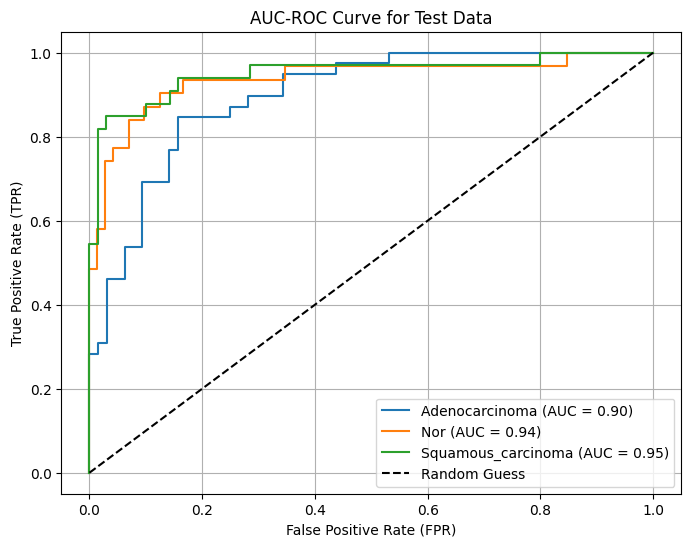


Macro-Averaged Test AUC: 0.93
94/94 ━━━━━━━━━━━━━━━━━━━━ 108s 1s/step

AUC-ROC for each class:
Adenocarcinoma - AUC: 0.80
Nor - AUC: 0.99
Squamous_carcinoma - AUC: 0.85


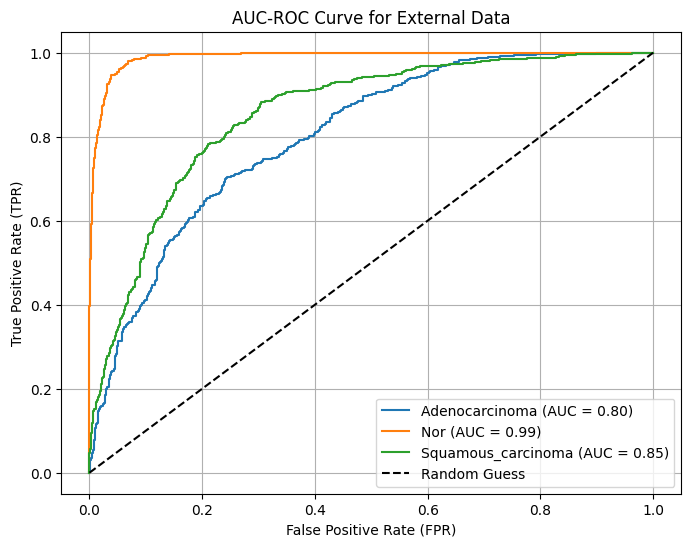


Macro-Averaged Test AUC: 0.88


In [3]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
import numpy as np
# Predicting on validation data
val_predictions = model.predict(val_generator)
val_pred_labels = np.argmax(val_predictions, axis=1)
val_true_labels = val_generator.classes

# Predicting on test data
test_predictions = model.predict(test_generator)
test_pred_labels = np.argmax(test_predictions, axis=1)
test_true_labels = test_generator.classes
print("🔍 Validation Data Metrics:")
print(classification_report(val_true_labels, val_pred_labels, target_names=val_generator.class_indices.keys()))

print("🔍 Test Data Metrics:")
print(classification_report(test_true_labels, test_pred_labels, target_names=test_generator.class_indices.keys()))

# Additional individual metrics for better control
print("Validation Accuracy:", accuracy_score(val_true_labels, val_pred_labels))
print("Validation Precision:", precision_score(val_true_labels, val_pred_labels, average='weighted'))
print("Validation Recall:", recall_score(val_true_labels, val_pred_labels, average='weighted'))
print("Validation F1-Score:", f1_score(val_true_labels, val_pred_labels, average='weighted'))

print("Test Accuracy:", accuracy_score(test_true_labels, test_pred_labels))
print("Test Precision:", precision_score(test_true_labels, test_pred_labels, average='weighted'))
print("Test Recall:", recall_score(test_true_labels, test_pred_labels, average='weighted'))
print("Test F1-Score:", f1_score(test_true_labels, test_pred_labels, average='weighted'))

# Predict probabilities for the test dataset
test_predictions =model.predict(test_generator, verbose=1)

# True labels from the test generator
test_true_labels = test_generator.classes  # True class labels
class_labels = list(test_generator.class_indices.keys())  # Class names

# Binarize the true labels for multi-class
from sklearn.preprocessing import label_binarize
test_true_labels_binarized = label_binarize(test_true_labels, classes=range(len(class_labels)))

# Compute and print AUC for each class
from sklearn.metrics import roc_curve, auc

print("\nAUC-ROC for each class:")

for i in range(len(class_labels)):
    fpr, tpr, _ = roc_curve(test_true_labels_binarized[:, i], test_predictions[:, i])
    roc_auc = auc(fpr, tpr)
    print(f"{class_labels[i]} - AUC: {roc_auc:.2f}")

# Plot ROC curves
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
for i in range(len(class_labels)):
    fpr, tpr, _ = roc_curve(test_true_labels_binarized[:, i], test_predictions[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{class_labels[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('AUC-ROC Curve for Test Data')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.grid()
plt.show()

# Compute macro-average AUC
from sklearn.metrics import roc_auc_score
macro_roc_auc = roc_auc_score(test_true_labels_binarized, test_predictions, average="macro")
print(f"\nMacro-Averaged Test AUC: {macro_roc_auc:.2f}")

# Predict probabilities for the test dataset
val_predictions =model.predict(val_generator, verbose=1)

# True labels from the test generator
val_true_labels = val_generator.classes  # True class labels
class_labels = list(val_generator.class_indices.keys())  # Class names

# Binarize the true labels for multi-class
from sklearn.preprocessing import label_binarize
val_true_labels_binarized = label_binarize(val_true_labels, classes=range(len(class_labels)))

# Compute and print AUC for each class
from sklearn.metrics import roc_curve, auc

print("\nAUC-ROC for each class:")

for i in range(len(class_labels)):
    fpr, tpr, _ = roc_curve(val_true_labels_binarized[:, i], val_predictions[:, i])
    roc_auc = auc(fpr, tpr)
    print(f"{class_labels[i]} - AUC: {roc_auc:.2f}")

# Plot ROC curves
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
for i in range(len(class_labels)):
    fpr, tpr, _ = roc_curve(val_true_labels_binarized[:, i], val_predictions[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{class_labels[i]} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.title('AUC-ROC Curve for External Data')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.legend()
plt.grid()
plt.show()

# Compute macro-average AUC
from sklearn.metrics import roc_auc_score
macro_roc_auc = roc_auc_score(val_true_labels_binarized, val_predictions, average="macro")
print(f"\nMacro-Averaged Test AUC: {macro_roc_auc:.2f}")